In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Datasets/link2/House_Price.csv")

In [3]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [4]:
df.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [5]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lb = q1 - (1.5*iqr)
ub = q3 + (1.5*iqr)
print(lb,ub)

price           5.062500
crime_rate     -5.310511
resid_area     15.825000
air_qual        0.186500
room_num        4.778500
age           -28.550000
dist1          -2.376250
dist2          -2.638750
dist3          -2.530000
dist4          -2.627500
teachers       15.600000
poor_prop      -8.057500
n_hos_beds      2.954250
n_hot_rooms     6.718300
rainfall       -5.000000
parks           0.024066
dtype: float64 price           36.962500
crime_rate       9.069639
resid_area      67.465000
air_qual         0.886500
room_num         7.730500
age            167.650000
dist1           10.013750
dist2            9.571250
dist3           10.170000
dist4            9.552500
teachers        26.800000
poor_prop       31.962500
n_hos_beds      12.768250
n_hot_rooms     18.642300
rainfall        83.000000
parks            0.083795
dtype: float64


C:\Users\joben\AppData\Local\Temp\ipykernel_6788\2542816970.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
C:\Users\joben\AppData\Local\Temp\ipykernel_6788\2542816970.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)


In [6]:
df1 = df.filter(['airport','waterbody','bus_ter'])
df1

,airport,waterbody,bus_ter
0,YES,River,YES
1,NO,Lake,YES
2,NO,None,YES
3,YES,Lake,YES
4,NO,Lake,YES
...,...,...,...
501,NO,Lake and River,YES
502,YES,Lake and River,YES
503,NO,None,YES
504,YES,None,YES


In [7]:
df = df[(df>lb) & (df<ub)].drop(['airport','waterbody','bus_ter'],axis = 1)
df

C:\Users\joben\AppData\Local\Temp\ipykernel_6788\2416847085.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[(df>lb) & (df<ub)].drop(['airport','waterbody','bus_ter'],axis = 1)


,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,NaN,38,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,9.348,12.1792,27,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,6.612,13.1648,20,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,5.478,12.1912,31,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,7.940,15.1760,47,0.060694


In [8]:
df = pd.concat([df,df1],axis = 1)
df.dropna(inplace = True)
df

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport,waterbody,bus_ter
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,YES,River,YES
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,NO,Lake,YES
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,YES,Lake,YES
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,NO,Lake,YES
5,28.7,0.02985,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,7.174,14.2296,53,0.045910,YES,None,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,9.348,12.1792,27,0.056006,NO,Lake and River,YES
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,6.612,13.1648,20,0.059903,YES,Lake and River,YES
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,5.478,12.1912,31,0.057572,NO,None,YES
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,7.940,15.1760,47,0.060694,YES,None,YES


In [9]:
df.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
n_hos_beds     0
n_hot_rooms    0
rainfall       0
parks          0
airport        0
waterbody      0
bus_ter        0
dtype: int64

Hence there is no null element.

In [10]:
y = df.iloc[:,0].values
X = df.iloc[:,1:]

In [11]:
y= y.reshape(-1,1)

In [12]:
y

array([[24. ],
       [21.6],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [22.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.2],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19.4],
       [22. ],
       [17

In [13]:
X.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport,waterbody,bus_ter
0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,YES,River,YES
1,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,NO,Lake,YES
3,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,YES,Lake,YES
4,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,NO,Lake,YES
5,0.02985,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,7.174,14.2296,53,0.045910,YES,None,YES


In [14]:
X.waterbody.value_counts()

River             137
None              112
Lake               71
Lake and River     55
Name: waterbody, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

X.iloc[:,-3] = le1.fit_transform(X.iloc[:,-3])
X.iloc[:,-1] = le2.fit_transform(X.iloc[:,-1])

C:\Users\joben\AppData\Local\Temp\ipykernel_6788\3417045181.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,-3] = le1.fit_transform(X.iloc[:,-3])
C:\Users\joben\AppData\Local\Temp\ipykernel_6788\3417045181.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,-1] = le2.fit_transform(X.iloc[:,-1])


In [16]:
X.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport,waterbody,bus_ter
0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,1,River,0
1,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,0,Lake,0
3,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,1,Lake,0
4,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,0,Lake,0
5,0.02985,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,7.174,14.2296,53,0.045910,1,None,0


In [17]:
d1 = pd.get_dummies(X.waterbody)
d1

,Lake,Lake and River,None,River
0,0,0,0,1
1,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,0,0,1,0
...,...,...,...,...
501,0,1,0,0
502,0,1,0,0
503,0,0,1,0
504,0,0,1,0


In [18]:
d1 = d1.drop(['None'],axis = 1)
d1

,Lake,Lake and River,River
0,0,0,1
1,1,0,0
3,1,0,0
4,1,0,0
5,0,0,0
...,...,...,...
501,0,1,0
502,0,1,0
503,0,0,0
504,0,0,0


In [19]:
X = X.drop(['waterbody'],axis = 1)
X= pd.concat([X,d1],axis = 1)
X

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport,bus_ter,Lake,Lake and River,River
0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,1,0,0,0,1
1,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,0,0,1,0,0
3,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,1,0,1,0,0
4,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,0,0,1,0,0
5,0.02985,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,7.174,14.2296,53,0.045910,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,9.348,12.1792,27,0.056006,0,0,0,1,0
502,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,6.612,13.1648,20,0.059903,1,0,0,1,0
503,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,5.478,12.1912,31,0.057572,0,0,0,0,0
504,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,7.940,15.1760,47,0.060694,1,0,0,0,0


Splitting

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
X_train.dropna()
X_train.isnull().sum()

crime_rate        0
resid_area        0
air_qual          0
room_num          0
age               0
dist1             0
dist2             0
dist3             0
dist4             0
teachers          0
poor_prop         0
n_hos_beds        0
n_hot_rooms       0
rainfall          0
parks             0
airport           0
bus_ter           0
Lake              0
Lake and River    0
River             0
dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()
# X_train = ss_x.fit_transform(X_train)
# y_train = ss_y.fit_transform(y_train)

X_train.isnull().sum()

crime_rate        0
resid_area        0
air_qual          0
room_num          0
age               0
dist1             0
dist2             0
dist3             0
dist4             0
teachers          0
poor_prop         0
n_hos_beds        0
n_hot_rooms       0
rainfall          0
parks             0
airport           0
bus_ter           0
Lake              0
Lake and River    0
River             0
dtype: int64

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ss_x.fit_transform(X_train),ss_y.fit_transform(y_train))

LinearRegression()

In [23]:
X_train

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport,bus_ter,Lake,Lake and River,River
218,0.11069,43.89,0.550,5.951,93.8,2.92,2.88,3.08,2.68,23.6,17.92,8.730,14.1720,49,0.048032,1,0,0,0,0
334,0.03738,35.19,0.515,6.310,38.5,6.52,6.34,6.69,6.29,19.8,6.75,7.514,15.1656,53,0.055402,1,0,0,1,0
322,0.35114,37.38,0.493,6.041,49.9,4.93,4.43,4.87,4.66,20.4,7.70,8.908,13.1632,40,0.045675,0,0,0,0,0
246,0.33983,35.86,0.431,6.108,34.9,8.37,7.78,8.38,7.69,20.9,9.16,7.086,11.1944,25,0.048857,1,0,0,0,0
65,0.03584,33.37,0.398,6.290,17.8,6.62,6.43,6.85,6.55,23.9,4.67,9.470,12.1880,20,0.037496,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,5.66637,48.10,0.740,6.219,100.0,2.08,1.97,2.03,1.94,19.8,16.59,7.096,14.1184,54,0.077116,0,0,0,0,1
219,0.11425,43.89,0.550,6.373,92.4,3.65,3.25,3.37,3.19,23.6,10.50,6.160,13.1840,21,0.056016,1,0,0,0,0
122,0.09299,55.65,0.581,5.961,92.9,2.34,1.85,2.27,1.90,20.9,17.93,8.910,10.1640,51,0.060721,1,0,0,0,0
48,0.25387,36.91,0.448,5.399,95.3,5.98,5.68,5.96,5.86,22.1,30.81,7.088,14.1152,34,0.042666,0,0,0,0,0


In [24]:
import matplotlib.pyplot as plt

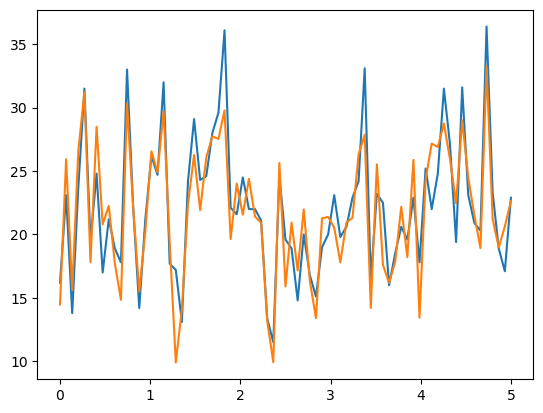

In [25]:
import numpy as np
plt.plot(np.linspace(0,5,75),y_test)
plt.plot(np.linspace(0,5,75),ss_y.inverse_transform(reg.predict(ss_x.fit_transform(X_test))))

## Polynomial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
polyreg = LinearRegression()
polyreg.fit(X_poly_train,y_train)

LinearRegression()

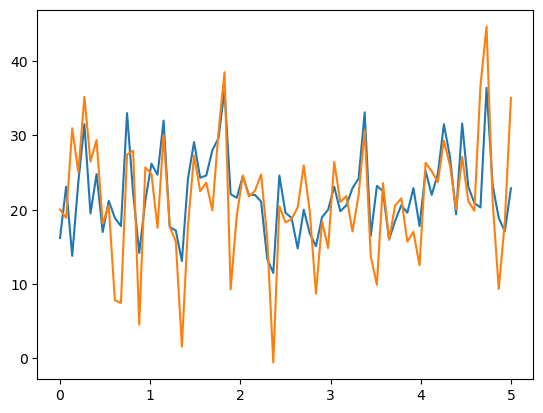

In [27]:
plt.plot(np.linspace(0,5,75),y_test)
plt.plot(np.linspace(0,5,75),polyreg.predict(X_poly_test))

## Support Vector Machines

In [28]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(ss_x.fit_transform(X_train),ss_y.fit_transform(y_train))

C:\Users\joben\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [29]:
ss_x.fit_transform(X_test).shape

(75, 20)

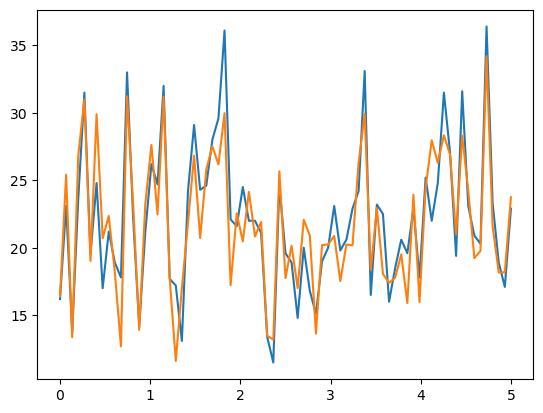

In [30]:
plt.plot(np.linspace(0,5,75),y_test)
plt.plot(np.linspace(0,5,75),ss_y.inverse_transform(svr.predict(ss_x.fit_transform(X_test)).reshape(-1,1)))

## Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(ss_x.fit_transform(X_train),ss_y.fit_transform(y_train))

DecisionTreeRegressor(random_state=0)

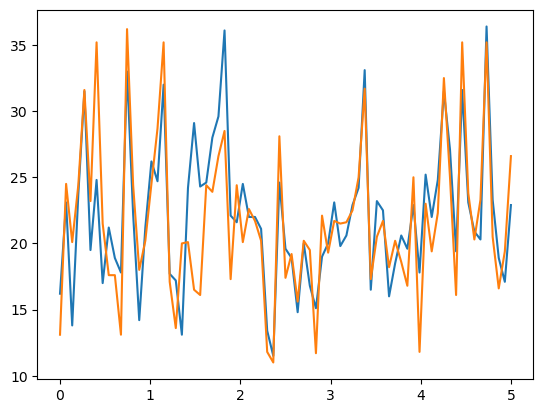

In [32]:
plt.plot(np.linspace(0,5,75),y_test)
plt.plot(np.linspace(0,5,75),ss_y.inverse_transform(dtr.predict(ss_x.fit_transform(X_test)).reshape(-1,1)))

## Lasso-Ridge Regressor

In [33]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha = 1)
ridgeR.fit(ss_x.fit_transform(X_train),ss_y.fit_transform(y_train))

Ridge(alpha=1)

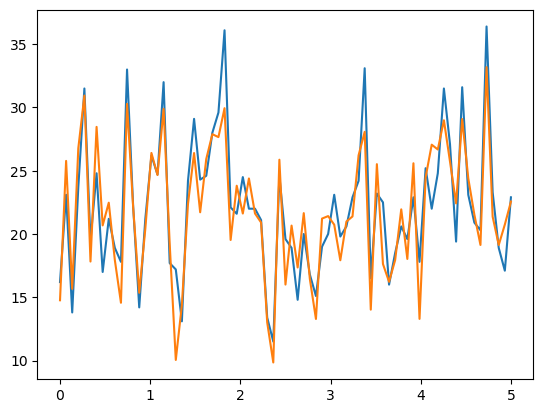

In [34]:
plt.plot(np.linspace(0,5,75),y_test)
plt.plot(np.linspace(0,5,75),ss_y.inverse_transform(ridgeR.predict(ss_x.fit_transform(X_test)).reshape(-1,1)))
